In [ ]:
#逻辑回归：二分类模型，线性回归的输出，作为逻辑回归的输入，输出在0,1<br/>
#思想：利用线性模型，根据特征重要性计算值，通过sigmoid（单调递增，把(-∞, +∞) 映射到 (0， 1)）<br/>
# 设置阈值（eg:0.5）大于为1类否则为0类<br/>
# 𝑝_𝑖 = sigmoid(w^Tx + b )是逻辑回归的输出结果
# 损失函数：Loss(L) = - ∑_(𝑖=1)^𝑚( 𝑦_𝑖*log(𝑝_𝑖) + (1−𝑦_𝑖)*log(1−𝑝_𝑖))

solver 损失函数优化方法:<br/>
          1 liblinear 对小数据集场景训练速度更快，sag 和 saga 对大数据集更快一些。<br/>
          2 正则化：<br/>
	1 sag、saga 支持 L2 正则化或者没有正则化<br/>
	2 liblinear 和 saga 支持 L1 正则化<br/>
penalty：正则化的种类，l1 或者 l2<br/>
C：正则化力度 <br/>


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#癌症分类预测
#1.获取数据 
data=pd.read_csv('data/breast-cancer-wisconsin.csv')
#2.基本数据处理 
data.replace('?',np.NAN,inplace=True)
#2.1 缺失值处理 
data.dropna(inplace=True)
#2.2 确定特征值,目标值 
x=data.iloc[:,1:-1]
y=data['Class']
#2.3 分割数据 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
#3.特征工程(标准化) 
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#4.机器学习(逻辑回归) 
# solver liblinear对小数据集场景训练速度更快，sag和saga对大数据集更快 liblinear和saga支持l1正则化，penalty 正则化种类 l1和l2 c正则化力度，c越大惩罚越大
model=LogisticRegression(solver='liblinear',penalty='l1',C=1.0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
#5.模型评估
accuracy=model.score(x_test,y_test)
accuracy

[2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 4 2 4 2 4 4 4 2 4 2 2 2 2 2 4 2 2 2 4
 2 2 2 2 4 2 4 4 4 4 2 4 4 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 2 4 4 4 2 4 4 4 4 2 2 2 4 2 4 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4 4 2
 2 2 2 4 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 2 2]


0.9854014598540146

混淆矩阵
正例 的样本,被分类为正例的数量,叫做真正例 TP，被分为假例的数量，叫伪反例，FN
假例的样本,被分为正例的数量,叫做伪正例,FP,被分类为假例的样本叫做真反例,TN

In [29]:
#这两条都有问题不知道为什么恶行都是0
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
y_true = ["恶性", "恶性", "恶性", "恶性", "恶性", "恶性", "良性", "良性", "良性", "良性"]
label=["恶性","良性"]
dataframe_labels=["恶性（正例）","良性(反例)"]
print("模型A")
y_pred1= ["恶性", "恶性", "恶性", "良性", "良性", "良性", "良性", "良性", "良性", "良性"]
result=confusion_matrix(y_true,y_pred1,labels=label)
print(pd.DataFrame(result,columns=dataframe_labels,index=label))

y_pred2= ["恶性", "恶性", "恶性", "恶性", "恶性", "恶性", "恶性", "恶性", "恶性", "良性"]
result=confusion_matrix(y_true,y_pred2,labels=label)
print(pd.DataFrame(result,columns=dataframe_labels,index=label))
arr=np.array(['TP','FN','FP','TN'])
arr=arr.reshape(2,2)
arr

模型A
    恶性（正例）  良性(反例)
恶性       3       3
良性       0       4
    恶性（正例）  良性(反例)
恶性       6       0
良性       3       1


array([['TP', 'FN'],
       ['FP', 'TN']], dtype='<U2')

精确率 (Precision) =TP/(TP+FP)<br/>
召回率 (Recall, TPR) = TP / (TP + FN) <br/>
准确率 (Accuracy) = (TP + TN) / 总样本数<br/>
F1- score 综合预测能力= 2*Precision*Recall/(Precision+Recall),是精确率和召回率的调和平均数

ROC曲线和AUC指标 用于描述正负样本的分辨能力
1 正样本中被预测为正样本的概率TPR 
2 负样本中被预测为正样本的概率FPR 

ROC曲线以模型的真正率TPR为纵轴，假正率FPR为横轴，它将模型在不同阈值下的表现以曲线的形式展现出来。

ROC曲线的优劣可以通过曲线下的面积（AUC）来衡量，AUC越大表示分类器性能越好<br/>
AUC=0.5时，表示分类器的性能等同于随机猜测<br/>
AUC=1时，表示分类器的性能完美，能够完全正确地将正负例分类。<br/>
曲线越靠近 (0,1) 点则模型对正负样本的辨别能力就越强


In [30]:
from sklearn.metrics import roc_auc_score
#sklearn.metrics.roc_auc_score(y_true, y_pred)
# sklearn.metrics.classification_report(y_true, y_pred, labels=[], target_names=None 

0.7624230951254141
0.7624230951254141
0.6472872378089588
              precision    recall  f1-score   support

       flag0       0.80      0.90      0.85      1547
       flag1       0.58      0.40      0.47       566

    accuracy                           0.76      2113
   macro avg       0.69      0.65      0.66      2113
weighted avg       0.74      0.76      0.75      2113



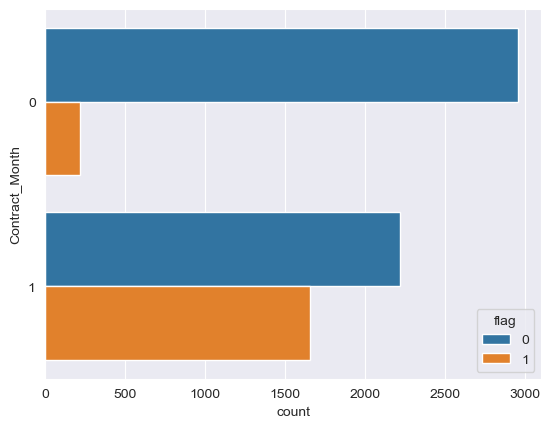

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#数据基本处理
churn_pd = pd.read_csv('./data/churn.csv')
    # 1 处理类别型的数据 类别型数据做one-hot编码 将类别转换为(010)
churn_pd = pd.get_dummies(churn_pd)
churn_pd.head()
#get_dummies 会将一份数据划分出多份
churn_pd.drop(['Churn_No', 'gender_Male'], axis=1, inplace=True)
churn_pd.rename(columns = {'Churn_Yes':'flag'}, inplace=True)
value_counts = churn_pd.flag.value_counts(1)
sns.countplot(data=churn_pd,y="Contract_Month",hue='flag')

# 2 特征处理   
# 2-1 确定目标值和特征值
x = churn_pd[['Contract_Month', 'internet_other', 'PaymentElectronic']]
y = churn_pd['flag']
# 2-2 数据集划分   
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3,random_state=100)
#实例化模型，训练模型，预测模型
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#模型评估
my_accuracy_sorce=accuracy_score(y_test,y_pred)
my_score=model.score(x_test,y_test)
print(my_score)
print(my_accuracy_sorce)
#计算auc
my_auc=roc_auc_score(y_test,y_pred)
print(my_auc)
#报告
result=classification_report(y_test,y_pred,target_names=['flag0','flag1'])
print(result)